In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
columns = ['gene_id', 'c1', 'c2','c3','c4','c5','c6','c7','c8','c9']

In [4]:
NZM  = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/04_TEtranscripts/NZM/NZM.cntTable', sep = '\t' , names=columns, header = 1)
print(NZM.head())

           gene_id  c1  c2  c3  c4  c5  c6  c7  c8  c9
0  ENSG00000000005   0   0   0   0   0   0   0   0   0
1  ENSG00000000419  99  24  33  29  38  35  22  38  49
2  ENSG00000000457   8  11  11  10   5   5  12  11  15
3  ENSG00000000460  19  36   4  12  13  14  17  12  36
4  ENSG00000000938   0   0   0   0   0   0   0   0   0


In [5]:
#only keep the ERVs
NZM_ERV = NZM[NZM['gene_id'].str.startswith('Hsap')]

In [6]:
def filter_non_expressed_ERV(df):
    df = df.copy()
    count_columns = [col for col in df.columns if col.startswith('c')]
    
    # Sum values along the rows for selected columns
    df.loc[:, 'sum_counts'] = df[count_columns].astype(int).sum(axis=1)
    
    # Filter rows where sum_counts is greater than 0
    df = df.loc[df['sum_counts'] > 0]
    
    # Reset index starting from 0
    df.reset_index(drop=True, inplace=True)
    
    # Drop the temporary 'sum_counts' column
    del df['sum_counts']
    
    return df

In [7]:
expr_ERV = filter_non_expressed_ERV(NZM_ERV)

In [8]:
print(expr_ERV)

                              gene_id  c1  c2  c3  c4  c5  c6  c7  c8  c9
0  Hsap38.chr14.100880715.100884845.-   0  13   0   0   0   0   0  27   0
1    Hsap38.chr19.18995047.18995343.-   5   2   2   2   1   2   1   2   3
2     Hsap38.chr2.69960660.69961718.-   0   0   0   0   0   0   0   0   1
3   Hsap38.chr3.129171078.129171320.-  62  28  23  11  21  15  12  19  24
4   Hsap38.chr5.103087901.103088227.-   0   0   0   1   0   1   1   0   1
5     Hsap38.chr7.94663299.94664531.+   1   0   6   1   6   1   2   0  12
6     Hsap38.chr7.94664474.94665679.+   6   0   8   1   7   5   5   0  14


In [9]:
def reshape_dataframe(df):
    id_vars = ['gene_id']
    value_vars = [col for col in df.columns if col.startswith('c')]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='count')
    
    # Extract patient_id from column names
    #melted_df['patient_id'] = melted_df['patient_id'].str.split('_', expand=True)[1].astype(int)
    
    return melted_df

In [10]:
reshaped = reshape_dataframe(expr_ERV)


In [11]:
def visualise_ERV_expression(df, plot_type, threshold = False):
    plt.figure(figsize=(30, 30)) 

    if plot_type == 'scatter':
        sns.scatterplot(data=df, x='gene_id', y='count', hue='patient_id', palette = 'tab10') #s=4
    if plot_type == 'line':
        sns.lineplot(data=df, x='gene_id', y='count', hue='patient_id', palette = 'tab10')
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with TEtranscripts')

    # Adding legend
    plt.legend(title='Mouse ID', loc='upper right')
    if threshold == True:
        plt.xticks(rotation=90)

    plt.show()    

In [19]:
#visualise_ERV_expression(reshaped, 'scatter')

In [20]:
def visualise_ERV_expression_gropus(df, plot_type, threshold = False):
    plt.figure(figsize=(30, 30)) 

    palette = {'c1': 'red', 'c2': 'red', 'c3': 'red', 'c4': 'blue', 'c5': 'blue', 'c6': 'red', 'c7': 'red', 'c8': 'blue', 'c9': 'blue' }
    
    if plot_type == 'scatter':
        sns.scatterplot(data=df, x='gene_id', y='count', hue='patient_id', palette = palette) #s=4
    if plot_type == 'line':
        sns.lineplot(data=df, x='gene_id', y='count', hue='patient_id', palette = palette)
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with TEtranscripts')

    # Adding legend
    plt.legend(title='Mouse ID', loc='upper right')

    if threshold == True:
        plt.xticks(rotation=90)

    plt.show()    

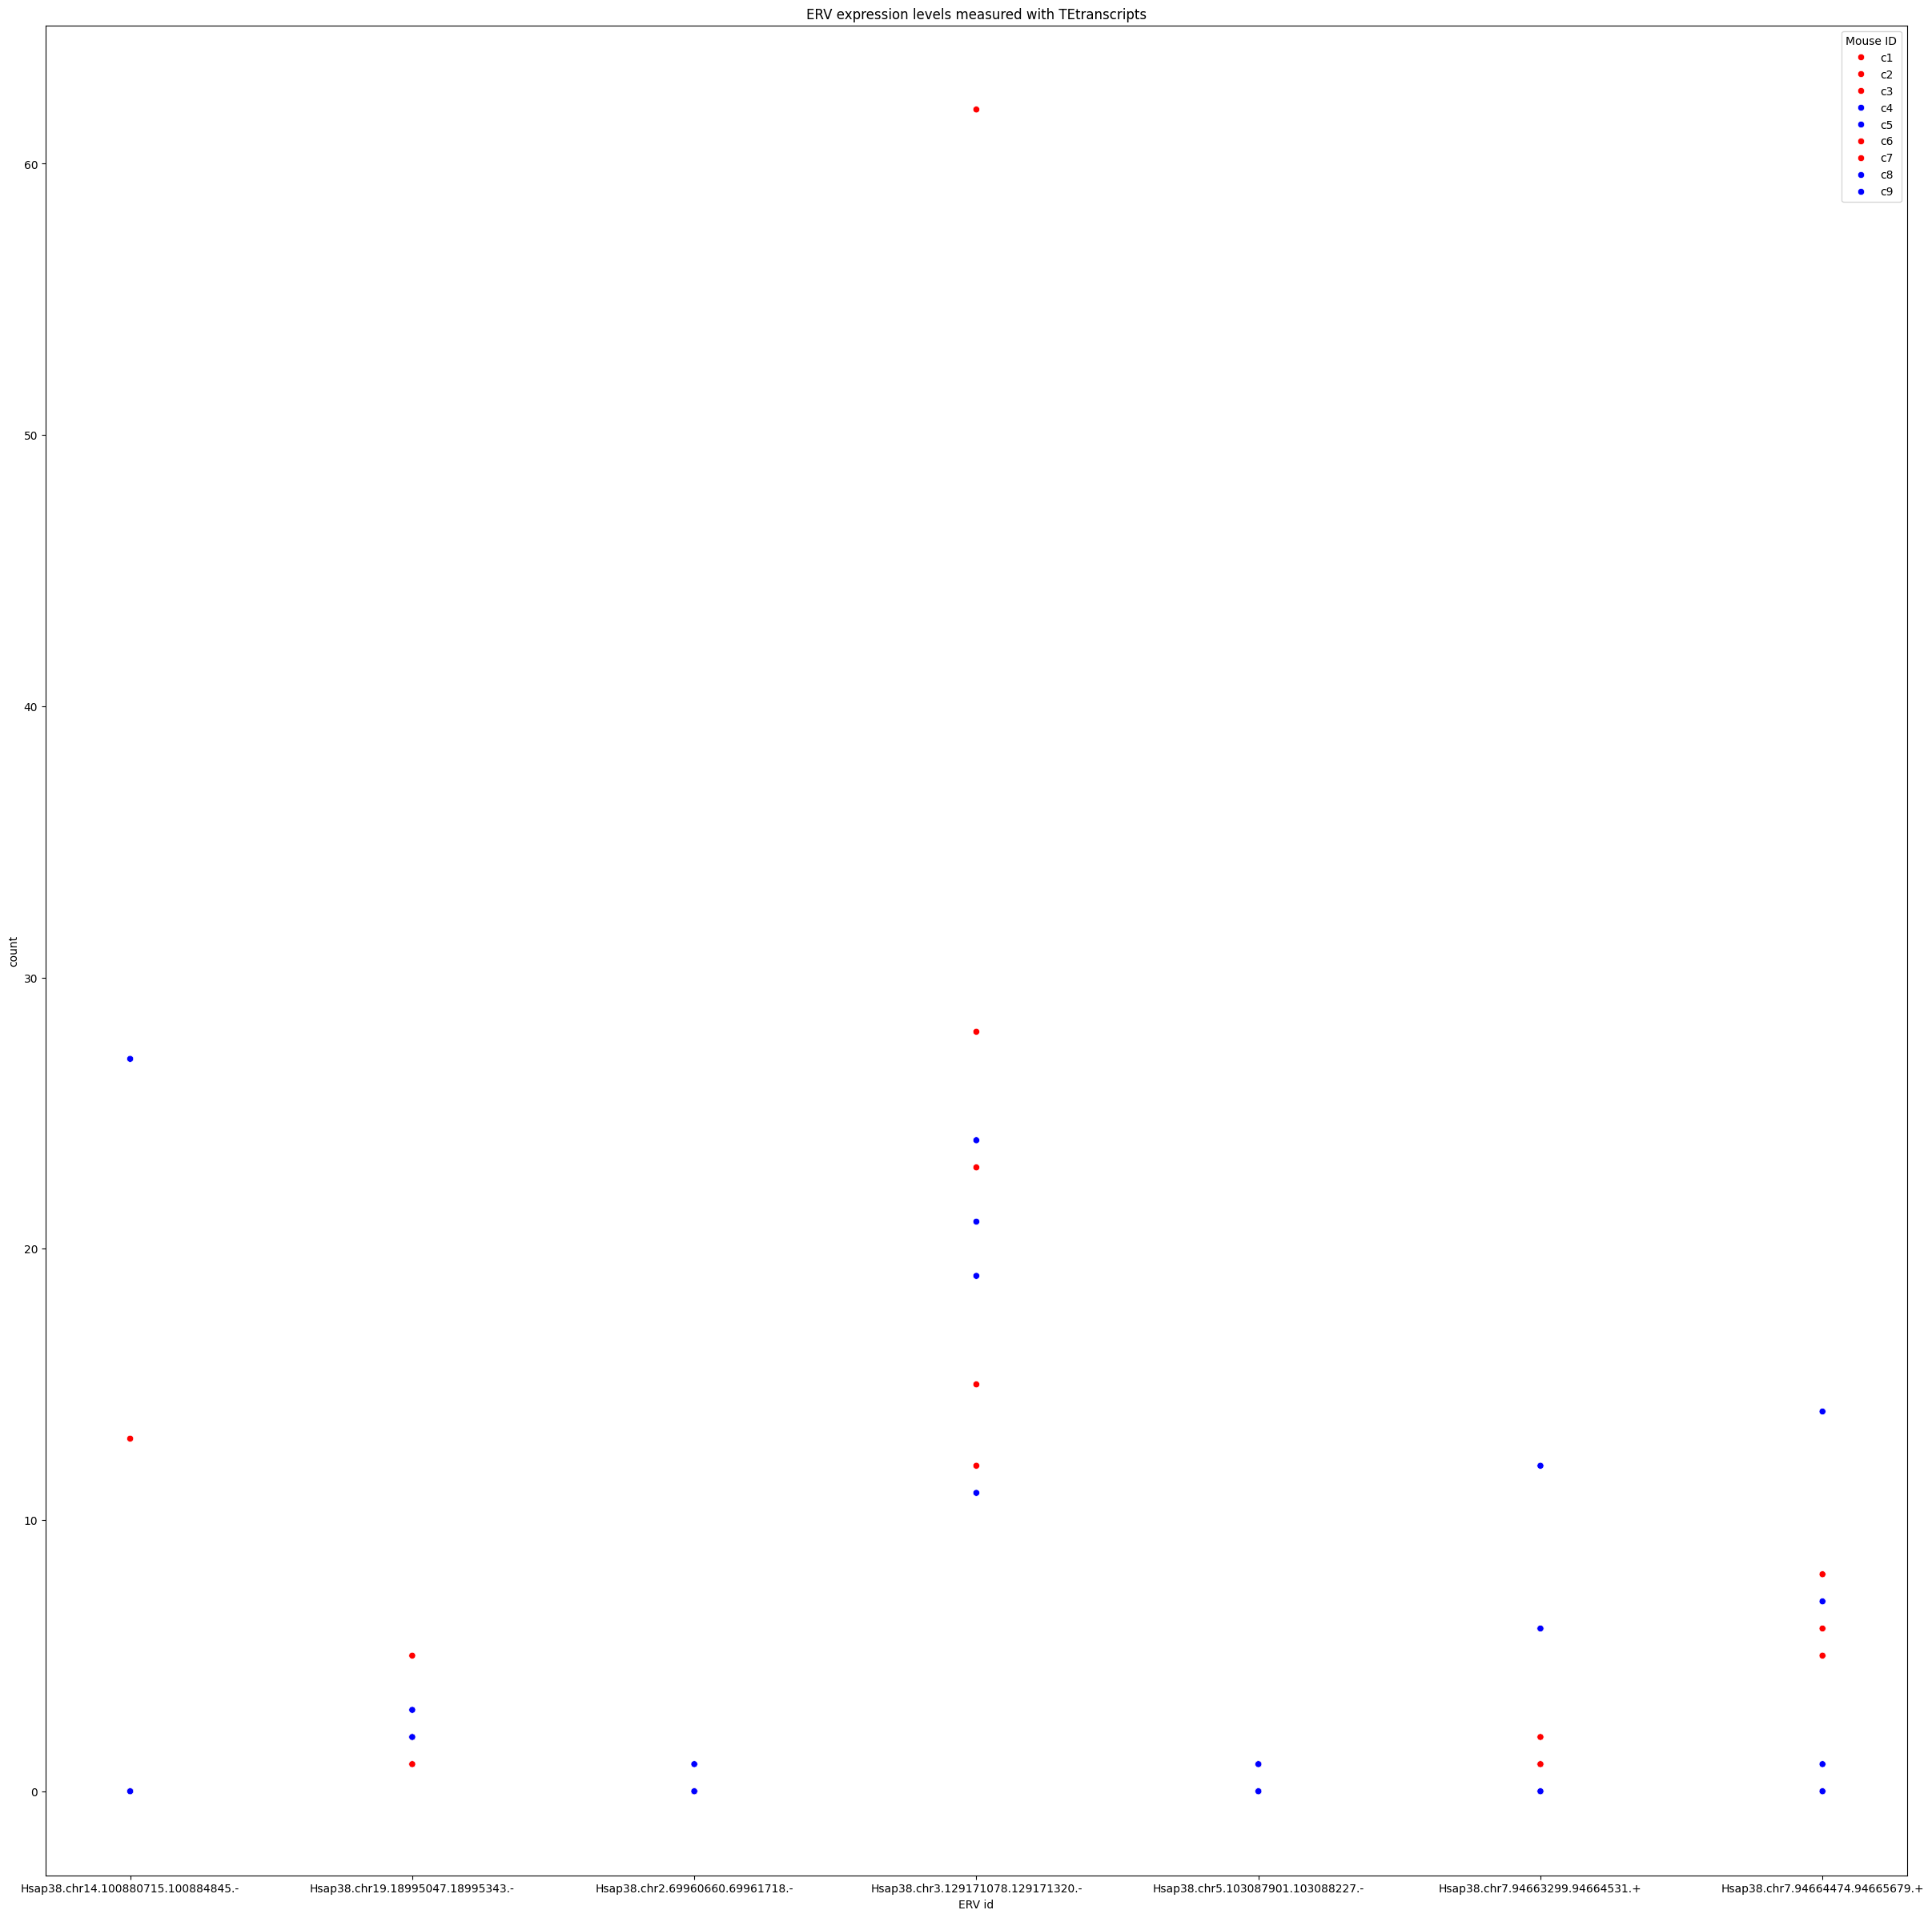

In [21]:
visualise_ERV_expression_gropus(reshaped, 'scatter')

In [46]:
#GET CELLS WITH HIGHEST ERV EXPRESSION
sum_df = expr_ERV.copy()
#filter out this one superfhighly expressed erv
sum_df_2 = sum_df[sum_df['c4'] < 800]

sum_df = sum_df.drop(columns = ['gene_id'])
sum_df_2 = sum_df_2.drop(columns = ['gene_id'])

column_sums = sum_df.sum(axis=0).tolist()
column_sums_2 = sum_df_2.sum(axis=0).tolist()

print(column_sums) 
print(column_sums_2) 
#[484, 753, 1198, 1430, 814, 724, 1004, 1493, 725]
#c1, c2, c3, c4, c5, c6, c7, c8,c9

#without dropping c5?
#gr1 = c1,c2,c6,c9
#gr2 = c3,c4,c7, c8 

#with dropping
#gr1 = c1, c4 
#gr2 = c2, c3, c5


c


[484, 753, 1198, 1430, 814, 724, 1004, 1493, 725]
[479, 748, 865, 293, 814, 593, 545, 600, 571]


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualise_barplot(df,plot_name, threshold=False):
    plt.figure(figsize=(30, 30)) 
    palette = {'c1': 'red', 'c2': 'red', 'c3': 'red', 'c4': 'blue', 'c5': 'blue', 'c6': 'red', 'c7': 'red', 'c8': 'blue', 'c9': 'blue' }
    
    sns.barplot(data=df, x='gene_id', y='count', hue='patient_id', palette=palette) #s=4
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with TEtranscripts')

    # Adding legend
    plt.legend(title='Mouse ID', loc='upper right')
    if threshold:
        plt.xticks(rotation=90)
    
    # Save plot under the DataFrame name
    plt.savefig(plot_name)
    plt.show()

# Example usage:
# Assuming df has been defined and named as follows
# df.name = 'my_dataframe'
# visualise_barplot(df, threshold=True)


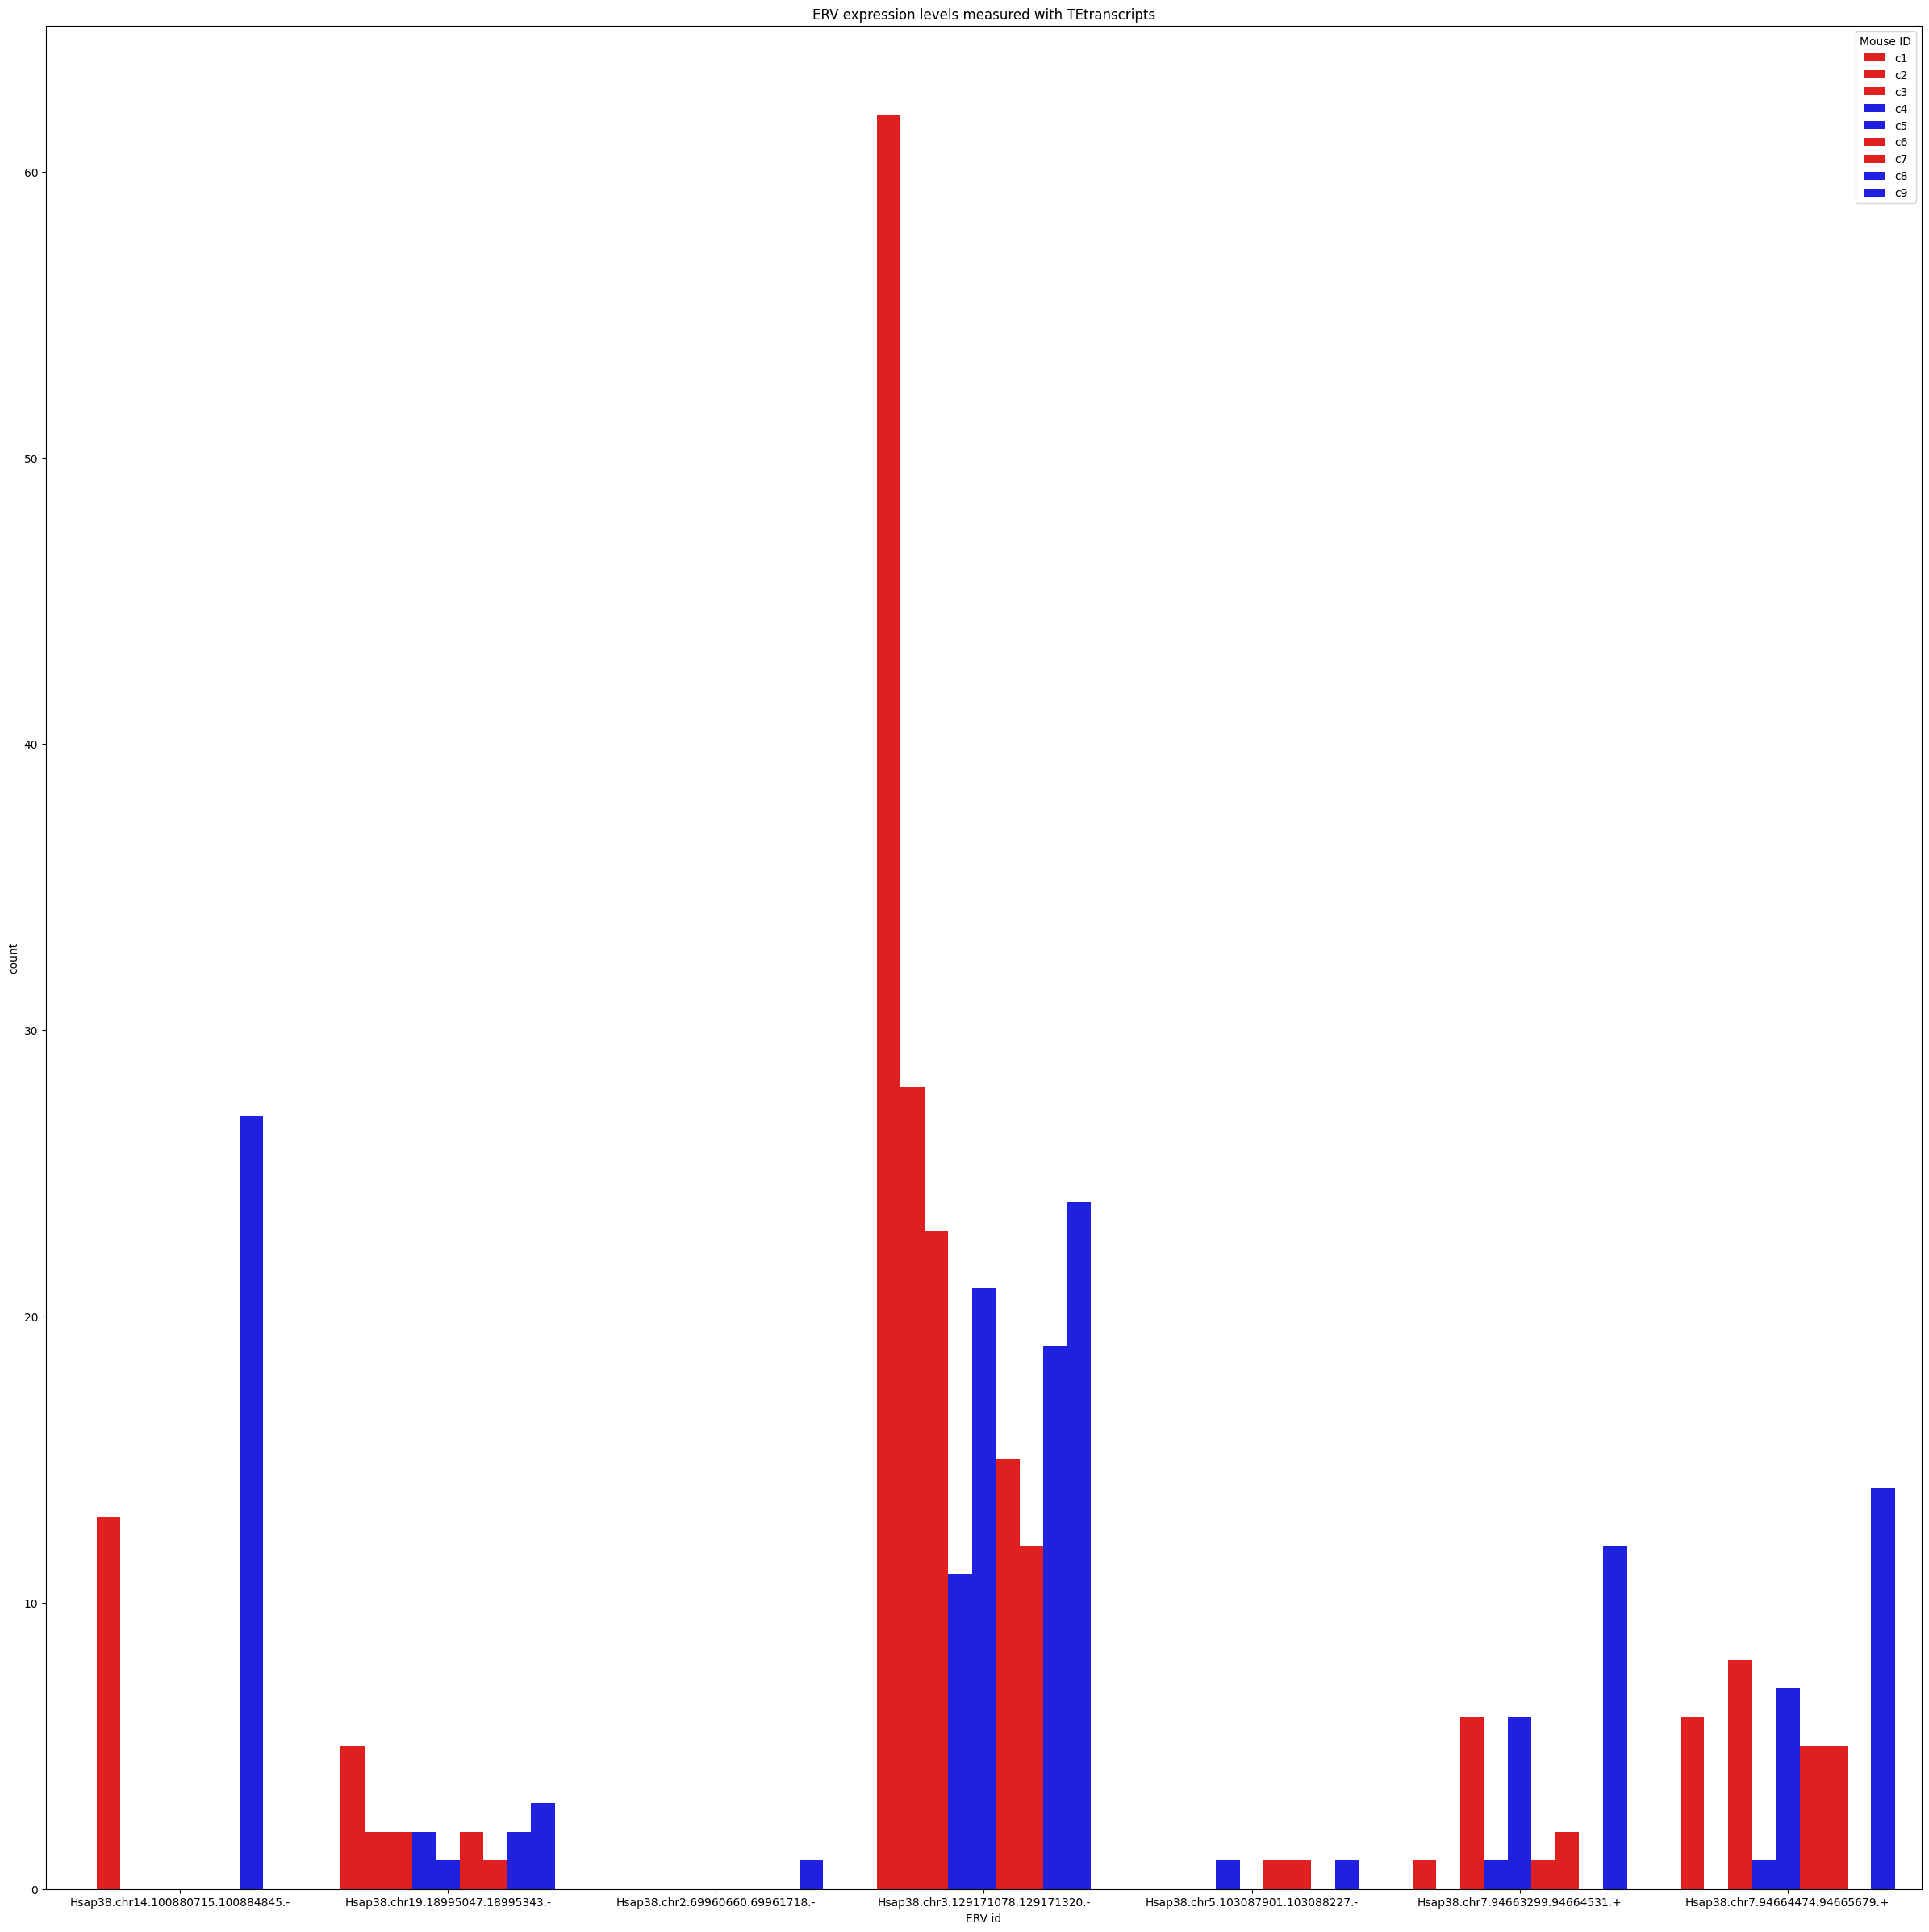

In [26]:
visualise_barplot(reshaped , 'full_NZN.jpg')